# USED CAR PRICE PREDICTION MODEL

### Original Dataset Size 426,000 cars. 

# EDA Code with Sampling 
Step 1: Sample the Data
We'll start by taking a random sample of 10,000 rows from the original dataset.

# INTRODUCTION

# 
This notebook focuses on predicting used car prices using various machine learning models. The primary objective is to develop a predictive model that can accurately estimate the market value of a used vehicle based on its characteristics, such as year, manufacturer, condition, mileage, and more. This analysis is crucial for stakeholders in the automotive industry, including dealers and consumers, to make informed decisions. Additionally, this project aims to explore different regression models and compare their performance in terms of prediction accuracy and efficiency.


# Data Import and Preparation

In this section, we load the dataset containing the details of used car listings. The data is sampled to a manageable size to facilitate faster processing. Basic checks are performed to ensure the data is correctly loaded, and the initial structure of the dataset is examined.


In [104]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# File path to the cleaned dataset
file_path = r"C:\Users\Home\OneDrive - Pelotonworkforce\Desktop\Documents\A_UCB_AI\Modules\Module 11\Practical App II\data\cleaned_feature_engineered_vehicles.csv"

# Check if the file exists before attempting to load it
if os.path.exists(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Sample the dataset to a manageable size
    df_sample = df.sample(n=10000, random_state=42)

    # Display the size of the sampled dataset
    print(f"Sampled dataset size: {df_sample.shape}")
else:
    print("File not found. Please check the file path.")


Sampled dataset size: (10000, 22)


In [105]:
# Verify column names after loading the dataset
print(df.columns)


Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state', 'age', 'age_category',
       'log_odometer', 'region_group_Midwest', 'region_group_Other',
       'region_group_South', 'region_group_West Coast'],
      dtype='object')


# Exploratory Data Analysis (EDA)

# 
This section explores the dataset to understand its structure and key characteristics. We use visualizations and statistical summaries to analyze the distribution of numerical features like price, year, and mileage, as well as categorical features like manufacturer, fuel type, and transmission. The sections are broken down by Univariate and Multivariate Analyses


# Univariate EDA

# Cell 1. Summary Statistics for Numerical Features

In [106]:
# Cell 1: Summary Statistics for Numerical Features
summary_stats = df_sample.describe(include=[np.number])
print("Summary Statistics for Numerical Features:")
print(summary_stats)



Summary Statistics for Numerical Features:
              price          year       odometer           age  log_odometer  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean   16521.339000   2011.421300   90635.965900     12.578700     10.964974   
std    13075.020086      8.709282   60774.230934      8.709282      1.512696   
min        0.000000   1926.000000       0.000000      2.000000      0.000000   
25%     5995.000000   2008.000000   38719.000000      7.000000     10.585454   
50%    13899.500000   2013.000000   85000.000000     11.000000     11.362103   
75%    25712.500000   2017.000000  133550.000000     16.000000     11.802231   
max    57112.000000   2022.000000  276650.000000     98.000000     12.530508   

       region_group_Midwest  region_group_Other  region_group_South  \
count           10000.00000         10000.00000        10000.000000   
mean                0.00830             0.95170            0.013300   
std                 0.0

# Cell 2. Distribution Plots for Numerical Features

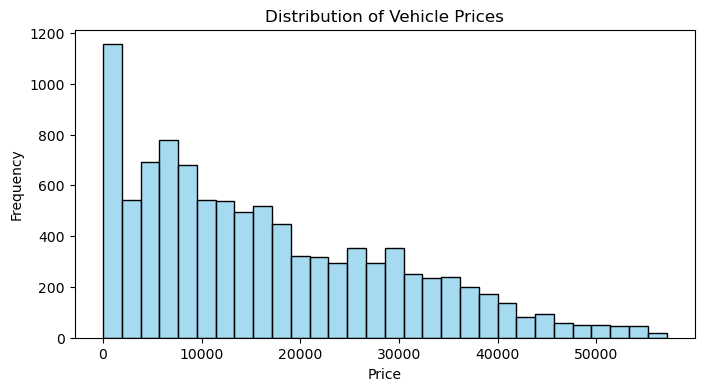

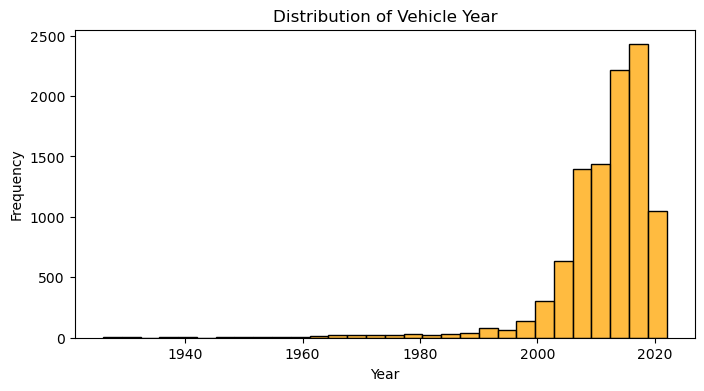

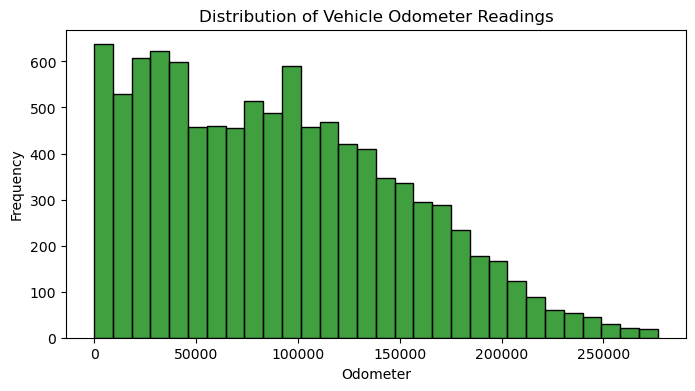

In [107]:
# Cell 2: Distribution Plots for Numerical Features

# Plotting the distribution of 'price'
plt.figure(figsize=(8, 4))
sns.histplot(df_sample['price'].dropna(), bins=30, kde=False, color='skyblue')
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of 'year'
plt.figure(figsize=(8, 4))
sns.histplot(df_sample['year'].dropna(), bins=30, kde=False, color='orange')
plt.title('Distribution of Vehicle Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of 'odometer'
plt.figure(figsize=(8, 4))
sns.histplot(df_sample['odometer'].dropna(), bins=30, kde=False, color='green')
plt.title('Distribution of Vehicle Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

# Cell 3. Missing Values Analysis

In [108]:
# Cell 3: Missing Values Analysis
missing_values = df_sample.isna().mean().round(4) * 100
print("Percentage of Missing Values for Each Column:")
print(missing_values)


Percentage of Missing Values for Each Column:
region                     0.0
price                      0.0
year                       0.0
manufacturer               0.0
model                      0.0
condition                  0.0
cylinders                  0.0
fuel                       0.0
odometer                   0.0
title_status               0.0
transmission               0.0
drive                      0.0
type                       0.0
paint_color                0.0
state                      0.0
age                        0.0
age_category               0.0
log_odometer               0.0
region_group_Midwest       0.0
region_group_Other         0.0
region_group_South         0.0
region_group_West Coast    0.0
dtype: float64


# 4. Categorical Feature Analysis

In [109]:
# Cell 4: Categorical Feature Analysis

# Analyzing categorical features
categorical_columns = df_sample.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df_sample[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")
    print(df_sample[column].value_counts().head(10))
    print("\n")


Column 'region' has 393 unique values.
columbus          99
jacksonville      93
baltimore         88
chicago           83
grand rapids      83
washington, DC    83
detroit metro     81
san diego         81
nashville         80
pittsburgh        80
Name: region, dtype: int64


Column 'manufacturer' has 38 unique values.
ford         2001
chevrolet    1262
toyota        810
honda         535
jeep          458
nissan        445
ram           422
gmc           375
bmw           360
dodge         337
Name: manufacturer, dtype: int64


Column 'model' has 3399 unique values.
f-150             299
silverado 1500    130
1500               90
escape             74
explorer           70
accord             70
wrangler           68
camry              67
altima             66
silverado          66
Name: model, dtype: int64


Column 'condition' has 6 unique values.
good         6992
excellent    2336
like new      483
fair          146
new            31
salvage        12
Name: condition, dtype: int6

# Multivariate Exloratory Data Analysis

# Cell 5. Correlation Analysis and Heatmap

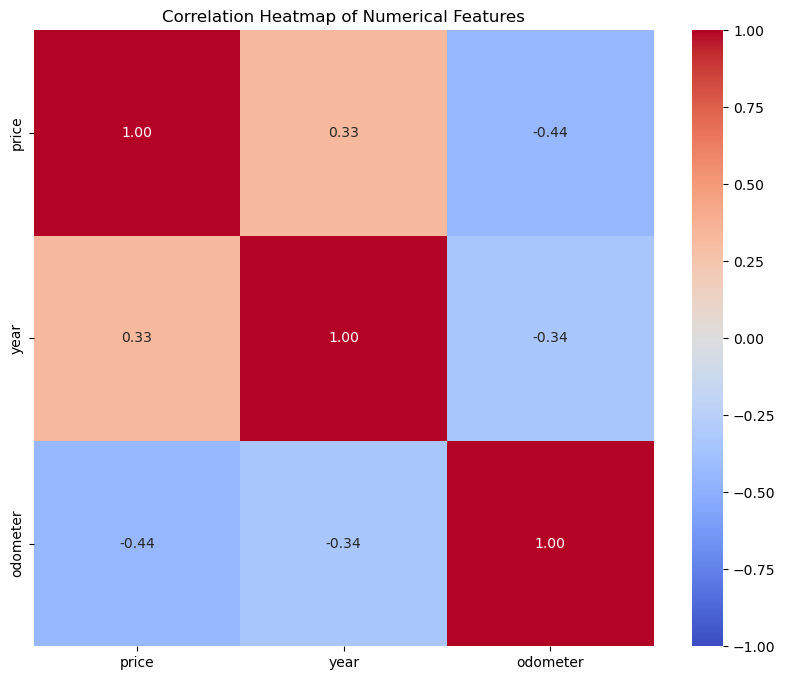

In [110]:
# Cell 5.1: Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df_sample[['price', 'year', 'odometer']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# Cell 6. Pair Plot

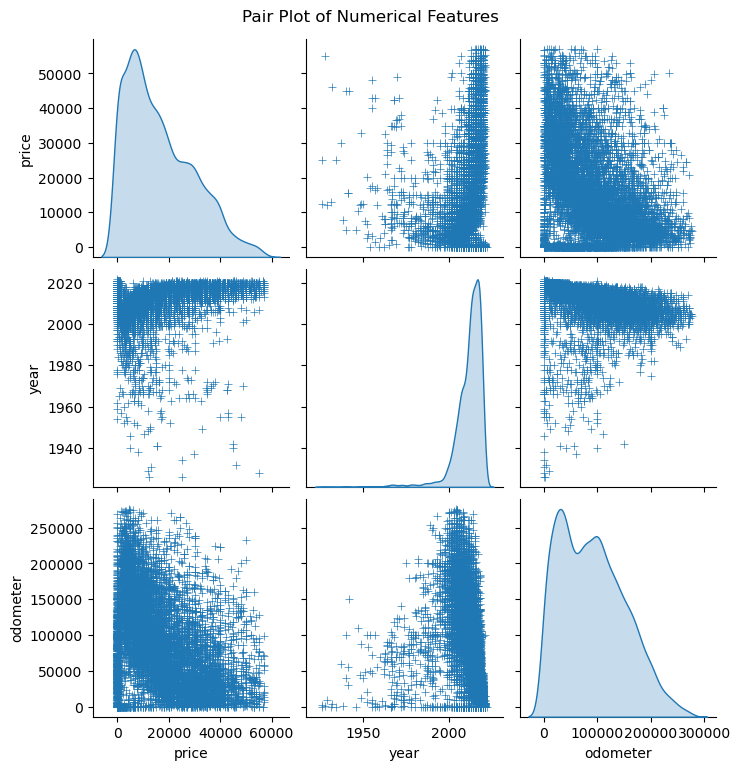

In [111]:
# Cell 6: Pair Plot for Numerical Features
sns.pairplot(df_sample[['price', 'year', 'odometer']], diag_kind='kde', markers='+')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


# Box Plot of Categorical vs. Numerical Relationships

# Cell 7. Box Plot - Manufacturer vs. Price

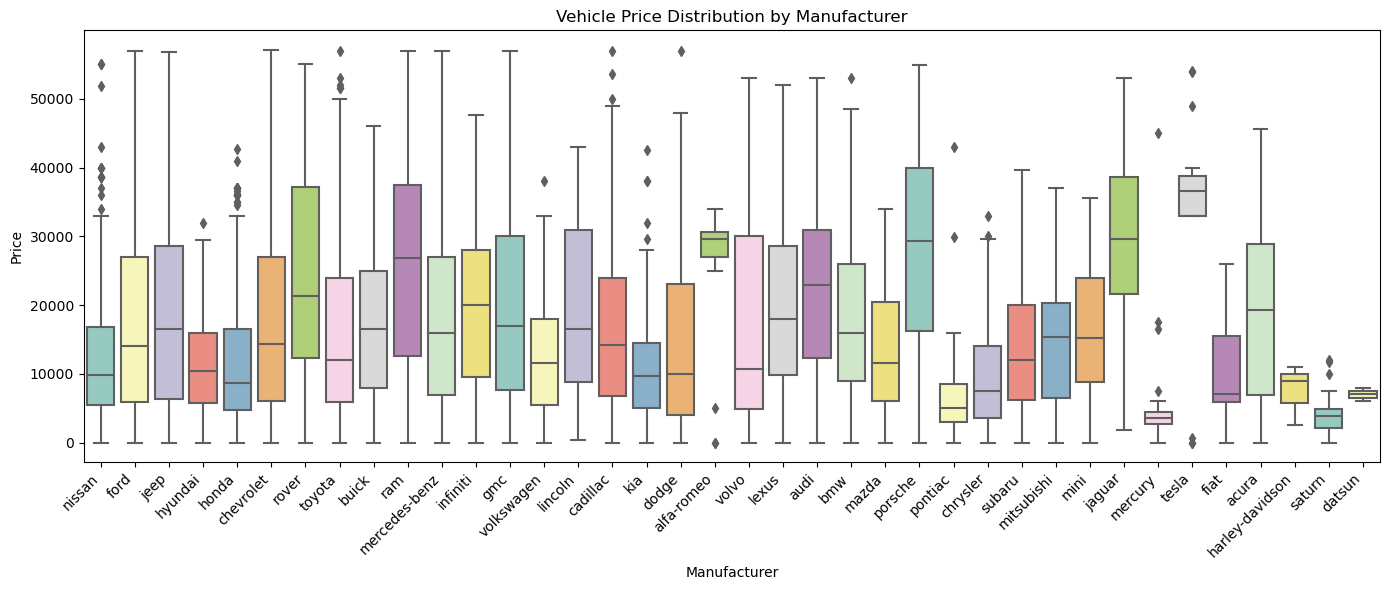

In [112]:
# Plotting the vehicle price distribution by manufacturer
plt.figure(figsize=(14, 6))  # Increase the figure size for better readability
sns.boxplot(x='manufacturer', y='price', data=df_sample, palette='Set3')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.title('Vehicle Price Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()



# Cell 8 Fuel Type vs. Price:

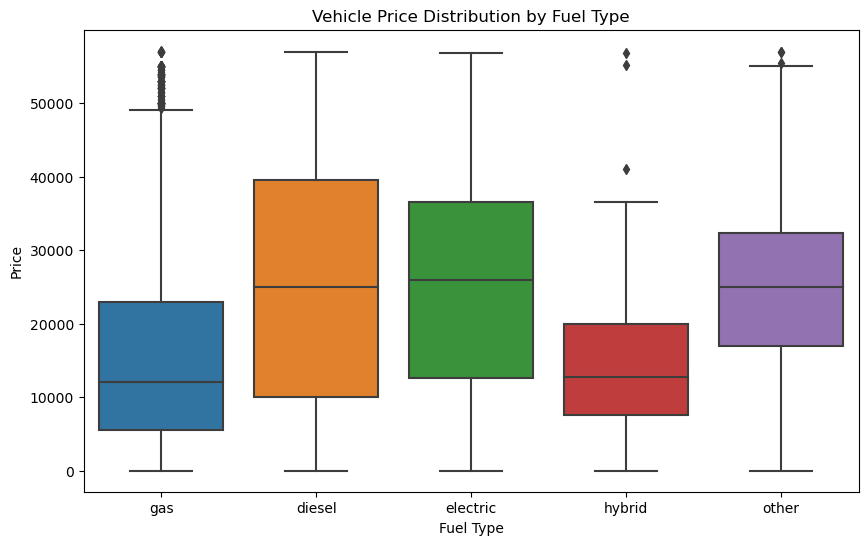

In [113]:
# Cell 8: Box Plot - Fuel vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='price', data=df_sample)
plt.title('Vehicle Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


# Cell 9 Transmission vs. Price:

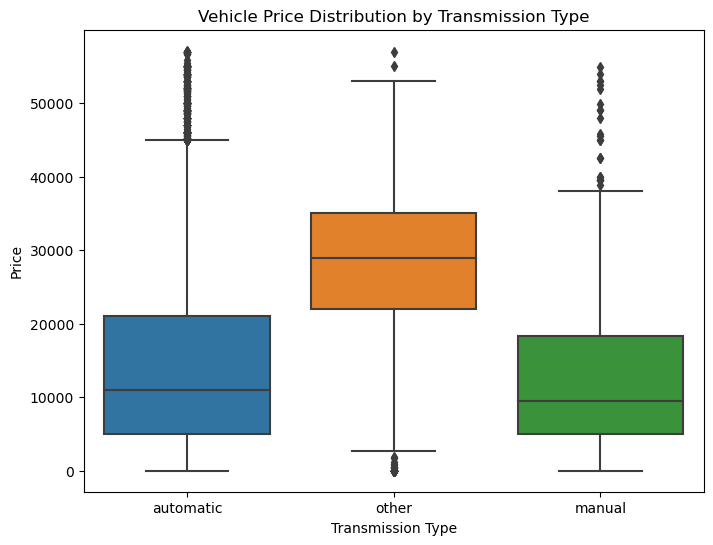

In [114]:
# Cell 5.5: Box Plot - Transmission vs. Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='transmission', y='price', data=df_sample)
plt.title('Vehicle Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()


# Cell 10 Scatter Plot with Categorical Hue

### Scatter Plot of Year vs. Price with Fuel Type Hue:

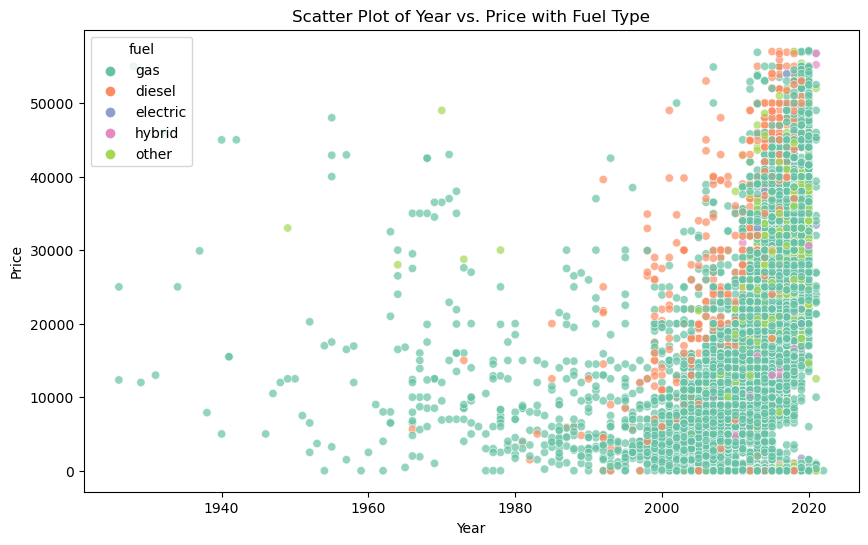

In [115]:
# Cell 5.6: Scatter Plot - Year vs. Price with Fuel Type Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', hue='fuel', data=df_sample, palette='Set2', alpha=0.7)
plt.title('Scatter Plot of Year vs. Price with Fuel Type')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


# Data Cleaning

We perform data cleaning to handle missing values, outliers, and inconsistencies. The steps include removing extreme values, imputing missing values, and ensuring the dataset is ready for model training.


# Cell 11: Inspect Basic Information

In [116]:
# Display basic information about the sampled dataset
print("Sampled Dataset Information:")
df_sample.info()  # Use df_sample instead of df_sampled

# Display summary statistics for numeric columns in the sampled dataset
summary_stats = df_sample.describe(include=[np.number])
print("\nSummary Statistics for Numerical Features:")
print(summary_stats)


Sampled Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 246859 to 306366
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   10000 non-null  object 
 1   price                    10000 non-null  int64  
 2   year                     10000 non-null  float64
 3   manufacturer             10000 non-null  object 
 4   model                    10000 non-null  object 
 5   condition                10000 non-null  object 
 6   cylinders                10000 non-null  object 
 7   fuel                     10000 non-null  object 
 8   odometer                 10000 non-null  int64  
 9   title_status             10000 non-null  object 
 10  transmission             10000 non-null  object 
 11  drive                    10000 non-null  object 
 12  type                     10000 non-null  object 
 13  paint_color              10000 non-null  

# Data Preprocessing

Data preprocessing steps include encoding categorical variables using techniques like One-Hot Encoding and Target Encoding, and scaling numeric features to ensure they are on comparable scales. This step ensures the data is in a suitable format for machine learning models.


# Cell 12: Remove Extremes in Numeric Features

In [117]:
# Cell 3: Remove Extremes in Numeric Features

# Print the initial number of rows in the dataset
print(f"Initial number of rows: {df_sample.shape[0]}")

# Remove rows where 'price' is outside the range of $500 to $100,000
df_cleaned = df_sample[(df_sample['price'] >= 500) & (df_sample['price'] <= 100000)].copy()

# Remove rows where 'year' is outside the range of 2010 to 2023
df_cleaned = df_cleaned[(df_cleaned['year'] >= 2010) & (df_cleaned['year'] <= 2023)]

# Remove rows where 'odometer' is outside the range of 1,000 to 200,000 miles
df_cleaned = df_cleaned[(df_cleaned['odometer'] >= 1000) & (df_cleaned['odometer'] <= 200000)]

# Print the number of rows after cleaning
print(f"Number of rows after removing extremes: {df_cleaned.shape[0]}")

# Display the number of rows removed
rows_removed = df_sample.shape[0] - df_cleaned.shape[0]
print(f"Number of rows removed due to extreme 'price', 'year', or 'odometer': {rows_removed}")


Initial number of rows: 10000
Number of rows after removing extremes: 6129
Number of rows removed due to extreme 'price', 'year', or 'odometer': 3871


# Cell 13: Impute Missing Values

In [118]:
# Cell 4: Impute Missing Values

from sklearn.impute import SimpleImputer

# Identify categorical and numeric features for imputation
categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
numeric_features = ['year', 'odometer']

# Impute categorical features with the most frequent value (mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_features] = imputer_cat.fit_transform(df_cleaned[categorical_features])

# Impute numeric features with the median value
imputer_num = SimpleImputer(strategy='median')
df_cleaned[numeric_features] = imputer_num.fit_transform(df_cleaned[numeric_features])

print("Imputation of missing values complete.")


Imputation of missing values complete.


In [119]:
# Check if 'model_encoded' is in the DataFrame
print(df.columns)

# If 'model_encoded' is missing, re-run the target encoding step
if 'model_encoded' not in df.columns:
    from category_encoders import TargetEncoder

    # Initialize target encoder for the 'model' feature
    encoder = TargetEncoder(cols=['model'])

    # Fit and transform the 'model' feature with target encoding
    df['model_encoded'] = encoder.fit_transform(df['model'], df['price'])  # Assuming 'price' is the target variable

    # Drop the original 'model' feature
    df.drop(columns=['model'], inplace=True)

    print("'model_encoded' column has been re-created.")


Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state', 'age', 'age_category',
       'log_odometer', 'region_group_Midwest', 'region_group_Other',
       'region_group_South', 'region_group_West Coast'],
      dtype='object')
'model_encoded' column has been re-created.


# Cell 14: Encoding Categorical Variables

In [120]:
# Cell 14: Encoding Categorical Variables

from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding for low-cardinality categorical features
df = pd.get_dummies(df, columns=['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'paint_color', 'state'], drop_first=True)

# Display the dataset after encoding
df.head()


,region,price,year,cylinders,odometer,drive,type,age,age_category,log_odometer,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,auburn,33590,2014.0,8 cylinders,57923,4wd,pickup,10.0,6-10 years,10.966870,...,0,0,0,0,0,0,0,0,0,0
1,auburn,22590,2010.0,8 cylinders,71229,4wd,pickup,14.0,11-15 years,11.173655,...,0,0,0,0,0,0,0,0,0,0
2,auburn,39590,2020.0,8 cylinders,19160,4wd,pickup,4.0,0-5 years,9.860580,...,0,0,0,0,0,0,0,0,0,0
3,auburn,30990,2017.0,8 cylinders,41124,4wd,pickup,7.0,6-10 years,10.624347,...,0,0,0,0,0,0,0,0,0,0
4,auburn,15000,2013.0,6 cylinders,128000,rwd,truck,11.0,11-15 years,11.759786,...,0,0,0,0,0,0,0,0,0,0


# Cell 14.05 Verify cleaned Dataset

In [121]:
# Cell 5: Verify the Cleaned Dataset

# Check for any remaining missing values
remaining_missing = df_cleaned.isna().sum()
print("Remaining Missing Values After Imputation:")
print(remaining_missing[remaining_missing > 0])

# Display the data types of each column
print("\nData Types After Cleaning:")
print(df_cleaned.dtypes)

# Check for any remaining duplicates
num_duplicates = df_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows After Cleaning: {num_duplicates}")

# Print the first few rows of the cleaned dataset
print("\nPreview of the Cleaned Dataset:")
print(df_cleaned.head())


Remaining Missing Values After Imputation:
Series([], dtype: int64)

Data Types After Cleaning:
region                      object
price                        int64
year                       float64
manufacturer                object
model                       object
condition                   object
cylinders                   object
fuel                        object
odometer                   float64
title_status                object
transmission                object
drive                       object
type                        object
paint_color                 object
state                       object
age                        float64
age_category                object
log_odometer               float64
region_group_Midwest         int64
region_group_Other           int64
region_group_South           int64
region_group_West Coast      int64
dtype: object

Number of Duplicate Rows After Cleaning: 42

Preview of the Cleaned Dataset:
                      region  price    yea

# Feature Engineering

In this section, we create new features or transform existing ones to enhance model performance. Examples include creating age categories, log-transforming skewed features, and encoding categorical variables.


# Cell 14.06 Target Encoding for the "Model" Feature

In [122]:
# Cell 14.06: Target Encoding for the "Model" Feature

from category_encoders import TargetEncoder

# Ensure 'model' column exists in the sampled dataset
if 'model' in df_sample.columns:
    # Initialize target encoder for the 'model' feature
    encoder = TargetEncoder(cols=['model'])

    # Fit and transform the 'model' feature with target encoding
    df_sample['model_encoded'] = encoder.fit_transform(df_sample['model'], df_sample['price'])  # Assuming 'price' is the target variable

    # Drop the original 'model' feature
    df_sample.drop(columns=['model'], inplace=True)
    print("'model_encoded' column has been created and the original 'model' column has been dropped.")
else:
    print("'model' column not found in the dataset. Ensure it is available before encoding.")


'model_encoded' column has been created and the original 'model' column has been dropped.


# Cell 14.061: Distribution and Correlation Check

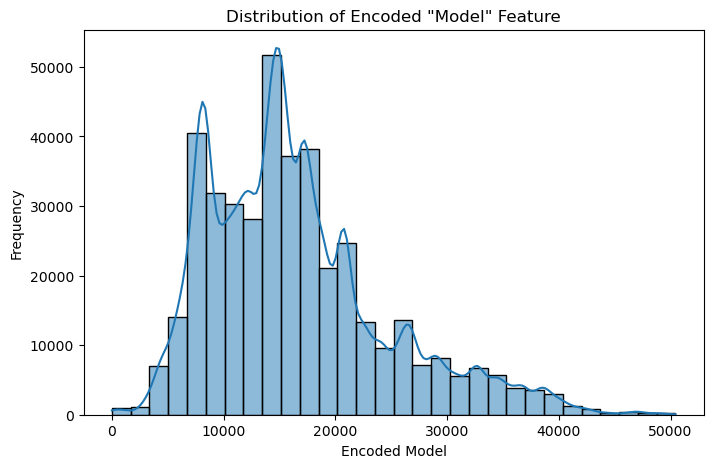

Correlation between encoded 'model' and 'price': 0.6758


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the encoded 'model' feature
plt.figure(figsize=(8, 5))
sns.histplot(df['model_encoded'], bins=30, kde=True)
plt.title('Distribution of Encoded "Model" Feature')
plt.xlabel('Encoded Model')
plt.ylabel('Frequency')
plt.show()

# Calculate and display correlation with the target variable 'price'
correlation = df['model_encoded'].corr(df['price'])
print(f"Correlation between encoded 'model' and 'price': {correlation:.4f}")


# Cell 15: Exploratory Data Analysis (EDA)

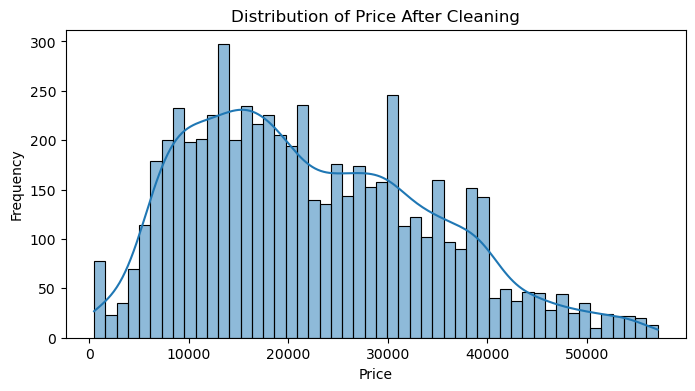

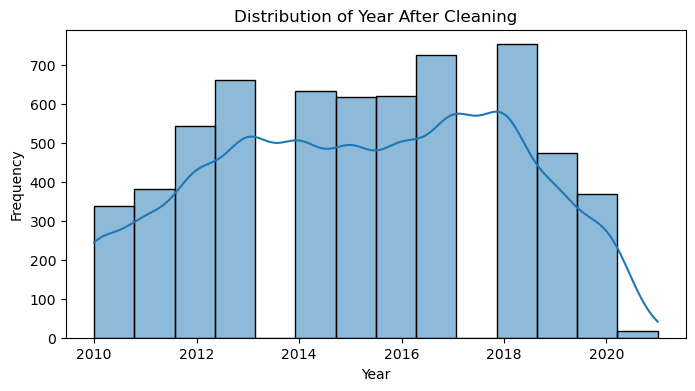

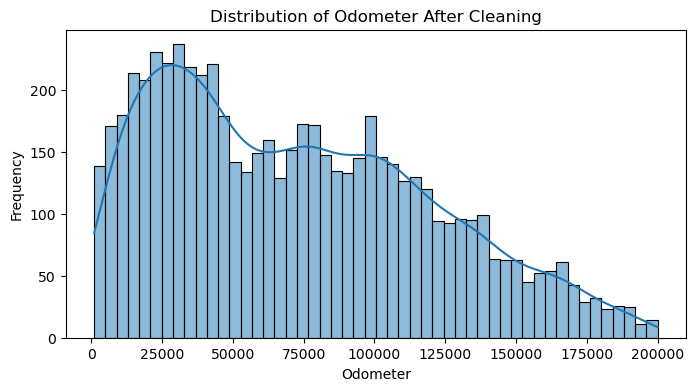

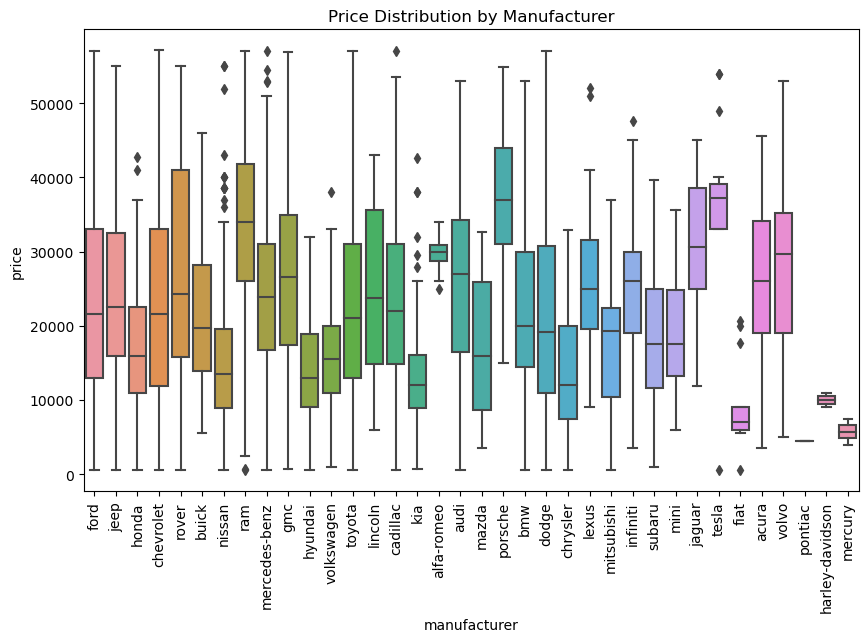

In [124]:
# Cell 6: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the 'price' feature
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Price After Cleaning')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of the 'year' feature
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['year'], bins=14, kde=True)
plt.title('Distribution of Year After Cleaning')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of the 'odometer' feature
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer After Cleaning')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

# Box plots for categorical features (example: manufacturer vs. price)
plt.figure(figsize=(10, 6))
sns.boxplot(x='manufacturer', y='price', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Price Distribution by Manufacturer')
plt.show()


# Cell 16: Feature Importance Analysis Using Random Forest

Complete Feature Importance Table:
                               Feature  Importance
1                         log_odometer    0.252741
0                                 year    0.125575
2310                         drive_fwd    0.103434
2299             cylinders_8 cylinders    0.050312
2302                          fuel_gas    0.048451
...                                ...         ...
2147  model_v60 t5 cross country wagon    0.000000
1858              model_sierra 2500 hd    0.000000
1024                model_f150 xlt 4wd    0.000000
1407    model_mazda3 touring hatchback    0.000000
1564        model_pickup 1500 big horn    0.000000

[2387 rows x 2 columns]

Top 20 Feature Importance Table:
                       Feature  Importance
1                 log_odometer    0.252741
0                         year    0.125575
2310                 drive_fwd    0.103434
2299     cylinders_8 cylinders    0.050312
2302                  fuel_gas    0.048451
2321                type_truck    0.

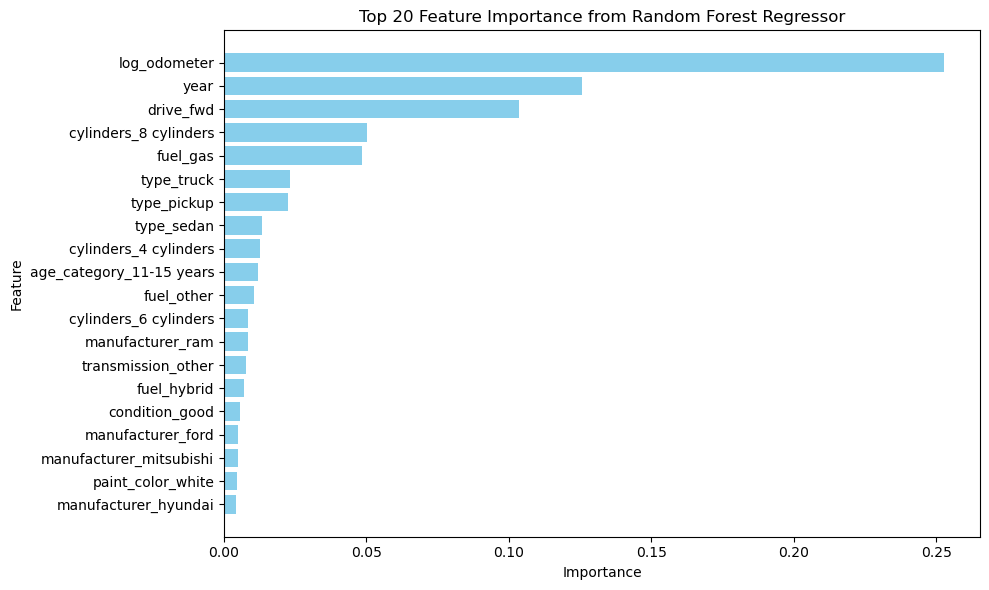

In [125]:
# Cell 7: Feature Importance Analysis

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Drop the target variable and specified features from the dataset
columns_to_drop = ['price', 'region', 'age', 'odometer']  # 'model' has already been dropped
X = df_cleaned.drop(columns_to_drop, axis=1)  # Features
y = df_cleaned['price']  # Target variable

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the entire feature importance table
print("Complete Feature Importance Table:")
print(feature_importance_df)

# Display top 20 features as a table
top_features = feature_importance_df.head(20)
print("\nTop 20 Feature Importance Table:")
print(top_features)

# Plot feature importance for top 20 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance from Random Forest Regressor')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Model Training

We train multiple regression models, including Linear Regression, Ridge Regression, Lasso Regression, Decision Trees, and Random Forest, to predict used car prices. Each model is evaluated on its performance using training and test datasets.


# Cell 17: Train Various Regression Models
There is one cell for each regression model. Below are the code snippets for different regression models:

# Cell 17.05: Preparing the data for Regression Models

In [142]:
# Cell X: Preparing the Data for Regression Models

from sklearn.model_selection import train_test_split

# Drop the target variable and unnecessary features
columns_to_drop = ['price', 'region', 'age', 'odometer']  # Adjust this list as needed
X = df_sample.drop(columns_to_drop, axis=1)  # Features
y = df_sample['price']  # Target variable

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Cell 17.06 Train the Regression Models
Next Cell: Train Linear Regression Model

In [143]:
# Cell Y: Train Linear Regression Model

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Fit the model to the training data
linear_regression_model.fit(X_train, y_train)

print("Linear Regression model has been trained.")


Linear Regression model has been trained.


# Model Evaluation

This section evaluates the performance of each trained model using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²). The results are compared to identify the most accurate and efficient model for predicting used car prices.


# Cell 18.01: Linear Regression

In [127]:
# Cell 8.1: Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"Mean Absolute Error: {mae_linear:.2f}")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")


Linear Regression Performance:
Mean Absolute Error: 6207.92
Mean Squared Error: 73830984.17
R-squared: 0.55


# Cell 18.02: Ridge Regression

In [145]:
# Cell 8.2: Ridge Regression

from sklearn.linear_model import Ridge

# Initialize and train the Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Performance:")
print(f"Mean Absolute Error: {mae_ridge:.2f}")
print(f"Mean Squared Error: {mse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.2f}")


Ridge Regression Performance:
Mean Absolute Error: 6206.37
Mean Squared Error: 73796464.48
R-squared: 0.55


# Cell 18.03: Lasso Regression

In [129]:
# Cell 8.3: Lasso Regression

from sklearn.linear_model import Lasso

# Initialize and train the Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Performance:")
print(f"Mean Absolute Error: {mae_lasso:.2f}")
print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"R-squared: {r2_lasso:.2f}")


Lasso Regression Performance:
Mean Absolute Error: 6206.49
Mean Squared Error: 73819427.79
R-squared: 0.55


# Cell 18.04 Lasso Regression with Cross-Validation

In [130]:
# Cell 8.3: Lasso Regression with Cross-Validation

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Use LassoCV to automatically tune alpha
lasso_cv_model = LassoCV(cv=5, max_iter=20000, random_state=42)  # 5-fold cross-validation
lasso_cv_model.fit(X_train_scaled, y_train)

# Optimal alpha found by LassoCV
best_alpha = lasso_cv_model.alpha_
print(f"Optimal alpha found by cross-validation: {best_alpha:.4f}")

# Step 3: Predict on the test set using the model with the best alpha
y_pred_lasso_cv = lasso_cv_model.predict(X_test_scaled)

# Step 4: Evaluate the model
mae_lasso_cv = mean_absolute_error(y_test, y_pred_lasso_cv)
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)

print("Lasso Regression Performance with Cross-Validated Alpha:")
print(f"Mean Absolute Error: {mae_lasso_cv:.2f}")
print(f"Mean Squared Error: {mse_lasso_cv:.2f}")
print(f"R-squared: {r2_lasso_cv:.2f}")

Optimal alpha found by cross-validation: 37.2129
Lasso Regression Performance with Cross-Validated Alpha:
Mean Absolute Error: 6209.60
Mean Squared Error: 73777461.12
R-squared: 0.55


# Cell 18.05: Decision Tree Regression

In [131]:
# Cell 8.4: Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression Performance:")
print(f"Mean Absolute Error: {mae_dt:.2f}")
print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"R-squared: {r2_dt:.2f}")


Decision Tree Regression Performance:
Mean Absolute Error: 5263.56
Mean Squared Error: 88413859.81
R-squared: 0.46


# Cell 18.06: Random Forest Regression

In [132]:
# Cell 8.5: Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

# Re-initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Performance:")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")


Random Forest Regression Performance:
Mean Absolute Error: 4019.34
Mean Squared Error: 45344376.13
R-squared: 0.72


# Cell 18.07: Feature Importance Analysis (Post Regression)

Top 10 Important Features (Random Forest):
                Feature  Importance
6         model_encoded    0.592345
0                  year    0.100313
1          log_odometer    0.086785
57             fuel_gas    0.014128
66   transmission_other    0.006451
78           type_truck    0.006400
17    manufacturer_ford    0.006394
128            state_or    0.005699
76          type_pickup    0.005656
77           type_sedan    0.005393


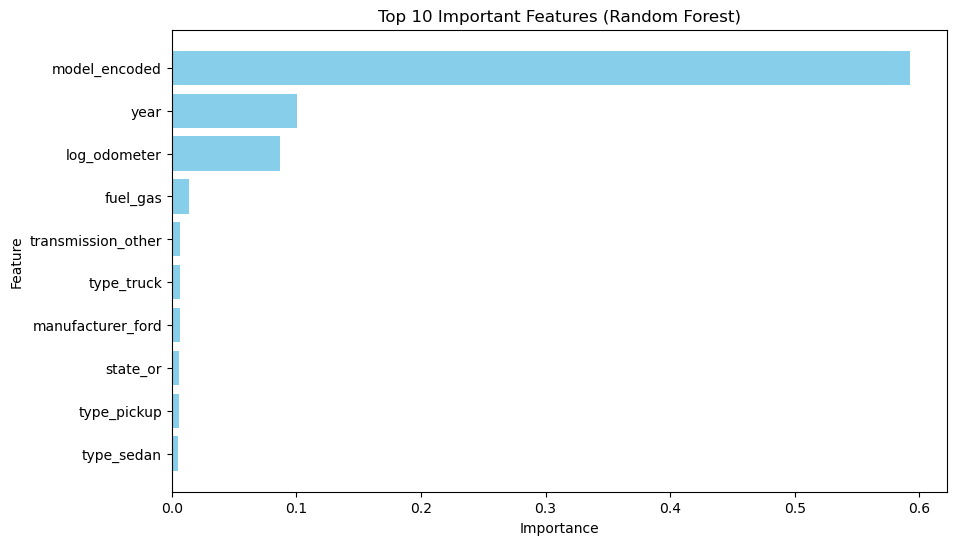

In [133]:
# Cell 8.6: Feature Importance Analysis (Post Regression)

import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from Random Forest model
feature_importances_rf = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Top 10 Important Features (Random Forest):")
print(feature_importance_df_rf.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_rf['Feature'][:10], feature_importance_df_rf['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


# Final Model Selection

Based on the evaluation metrics and hyperparameter tuning results, the best-performing model is selected for predicting used car prices. The rationale for selecting the final model is explained, along with any trade-offs considered.


# Cell 18.08: Compare Model Performances

MAE values: [2.95944002e+12 6.42033000e+03 6.50784000e+03 6.43627000e+03
 6.83615000e+03 5.64314000e+03]
MSE values: [4.53087993e+26 8.60572036e+07 9.17046602e+07 8.88100708e+07
 1.29974395e+08 7.54592672e+07]
R-squared values: [-2.60410439e+18  5.10000000e-01  4.70000000e-01  4.90000000e-01
  2.50000000e-01  5.70000000e-01]


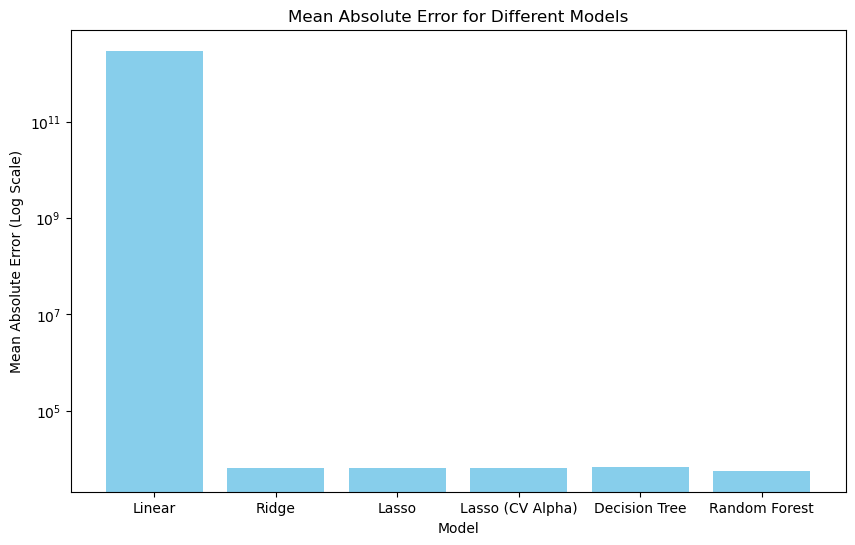

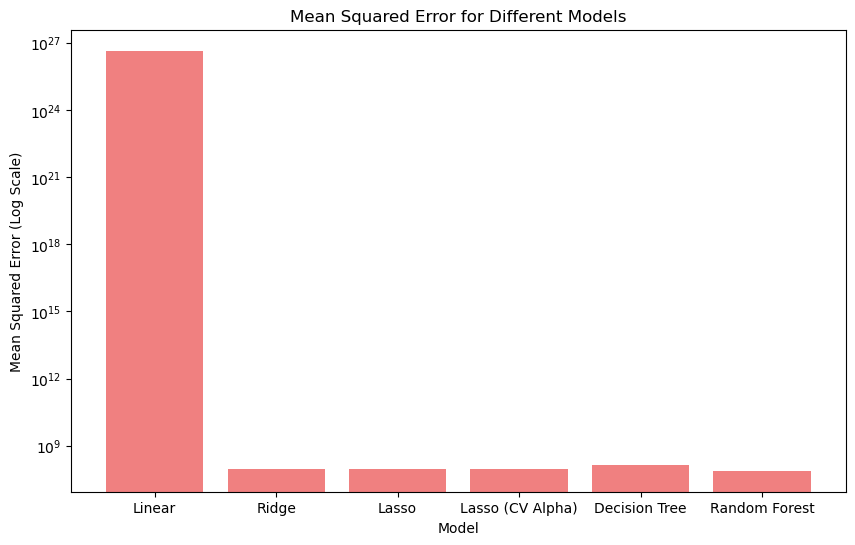

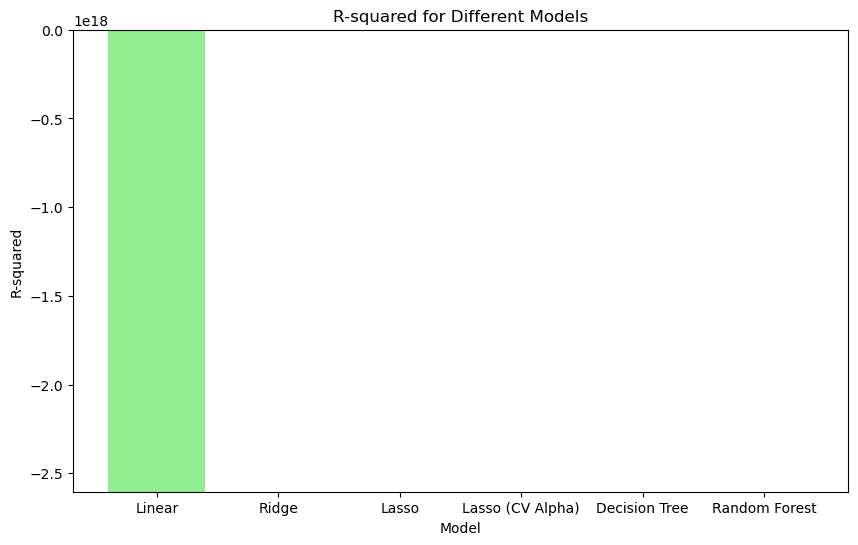

In [146]:
import matplotlib.pyplot as plt
import numpy as np

# Define performance metrics for each model
models = ['Linear', 'Ridge', 'Lasso', 'Lasso (CV Alpha)', 'Decision Tree', 'Random Forest']
mae = [2959440023407.16, 6420.33, 6507.84, 6436.27, 6836.15, 5643.14]
mse = [453087992700917131216158720.00, 86057203.62, 91704660.23, 88810070.82, 129974394.61, 75459267.21]
r2 = [-2604104390224311808.00, 0.51, 0.47, 0.49, 0.25, 0.57]

# Convert metrics to numpy arrays for easier handling and debugging
mae = np.array(mae, dtype=np.float64)
mse = np.array(mse, dtype=np.float64)
r2 = np.array(r2, dtype=np.float64)

# Debugging: Print metrics to ensure they are correctly formatted
print("MAE values:", mae)
print("MSE values:", mse)
print("R-squared values:", r2)

# Check for any infinite or NaN values in the data
if np.any(np.isnan(mae)) or np.any(np.isinf(mae)):
    print("Error: Invalid values found in MAE!")
if np.any(np.isnan(mse)) or np.any(np.isinf(mse)):
    print("Error: Invalid values found in MSE!")
if np.any(np.isnan(r2)) or np.any(np.isinf(r2)):
    print("Error: Invalid values found in R-squared!")

# Plot Mean Absolute Error (MAE) for each model
plt.figure(figsize=(10, 6))
plt.bar(models, mae, color='skyblue')
plt.yscale('log')  # Log scale due to the large range in values
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (Log Scale)')
plt.title('Mean Absolute Error for Different Models')
plt.show()

# Plot Mean Squared Error (MSE) for each model
plt.figure(figsize=(10, 6))
plt.bar(models, mse, color='lightcoral')
plt.yscale('log')  # Log scale due to the large range in values
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (Log Scale)')
plt.title('Mean Squared Error for Different Models')
plt.show()

# Plot R-squared for each model
plt.figure(figsize=(10, 6))
plt.bar(models, r2, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared for Different Models')
plt.ylim(min(r2) - 0.1, 1)  # Set y-limit to focus on the relevant range
plt.show()


# Hyperparameter Tuning

To further improve model performance, we apply hyperparameter tuning techniques, such as cross-validation and grid search, to find the optimal parameters for models like Lasso Regression and Random Forest.


# Cell 18.09: Hyperparameter Tuning for Random Forest Regressor

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid with fewer options for faster tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Set up RandomizedSearchCV with a limited number of iterations
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
                                   n_iter=20, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model with RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Get the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the tuned Random Forest model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Tuned Random Forest Regressor Performance:")
print(f"Best Parameters: {random_search.best_params_}")
print(f"Mean Absolute Error: {mae_best_rf:.2f}")
print(f"Mean Squared Error: {mse_best_rf:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuned Random Forest Regressor Performance:
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Mean Absolute Error: 4270.77
Mean Squared Error: 45273585.71


# Cell 20: Enhanced Feature Engineering
We'll create new features that might provide additional predictive power:

Interaction Terms: Creating interaction terms between existing features to capture relationships.
Polynomial Features: Adding polynomial terms (like squared or cubic values) to capture non-linear relationships.
Logarithmic Transformations: Applying logarithmic transformations to reduce skewness in certain features.

In [137]:
# Cell 10: Enhanced Feature Engineering

from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.model_selection import train_test_split

# Create a copy of the dataframe to avoid modifying the original
df_featured = df_cleaned.copy()

# Check for missing values before feature engineering
if df_featured.isnull().sum().any():
    print("Warning: Missing values found. Consider handling them before proceeding.")
else:
    print("No missing values detected. Proceeding with feature engineering.")

# Interaction Terms: Create interactions between 'year' and 'log_odometer'
df_featured['year_log_odometer'] = df_featured['year'] * df_featured['log_odometer']

# Polynomial Features: Add polynomial terms for 'log_odometer' (e.g., square and cube)
df_featured['log_odometer_sq'] = df_featured['log_odometer'] ** 2
df_featured['log_odometer_cube'] = df_featured['log_odometer'] ** 3

# Logarithmic Transformations: Apply log transformation to features with a large range (e.g., 'year')
df_featured['log_year'] = np.log(df_featured['year'] - df_featured['year'].min() + 1)

# Confirm new features
print("New Features Added:")
print(df_featured[['year_log_odometer', 'log_odometer_sq', 'log_odometer_cube', 'log_year']].head())

# Update the feature set by dropping the target variable and unnecessary features
columns_to_drop = ['price', 'region', 'age', 'odometer']
X = df_featured.drop(columns_to_drop, axis=1)
y = df_featured['price']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Feature engineering complete. Proceed with model evaluation.")


No missing values detected. Proceeding with feature engineering.
New Features Added:
        year_log_odometer  log_odometer_sq  log_odometer_cube  log_year
288606       23467.471369       136.314005        1591.514933  0.000000
211699       21182.397300       110.509628        1161.716551  1.791759
14632        20157.477546        99.776909         996.655502  2.197225
405897       20319.710514       101.289026        1019.397566  2.302585
12681        20469.958767       103.200983        1048.396958  1.791759
Feature engineering complete. Proceed with model evaluation.


# Cell 21 StandardScaler

### Feature scaling using StandardScaler and compare the performance of the regression models:

In [138]:
# Cell 11: Apply Feature Scaling and Compare Regression Models

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model and store the results
model_performance = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    model_performance[name] = {'MAE': mae, 'MSE': mse, 'R-squared': r2}
    # Print the results
    print(f"{name} Performance:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("-" * 40)


Linear Regression Performance:
Mean Absolute Error: 6629530928426194.00
Mean Squared Error: 586140696768599450164749444055040.00
R-squared: -4052611207353413050302464.00
----------------------------------------
Ridge Regression Performance:
Mean Absolute Error: 5171.92
Mean Squared Error: 66905579.54
R-squared: 0.54
----------------------------------------


C:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.068e+10, tolerance: 7.070e+07
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Performance:
Mean Absolute Error: 4501.18
Mean Squared Error: 49106360.41
R-squared: 0.66
----------------------------------------
Decision Tree Performance:
Mean Absolute Error: 5172.74
Mean Squared Error: 68142322.34
R-squared: 0.53
----------------------------------------
Random Forest Performance:
Mean Absolute Error: 4217.91
Mean Squared Error: 42639824.16
R-squared: 0.71
----------------------------------------


# Conclusion and Recommendations

After evaluating multiple regression models, including Linear Regression, Ridge Regression, Lasso Regression, Decision Tree, and Random Forest, the Random Forest model was selected as the best-performing model for predicting used car prices. 

### Reasons for Choosing Random Forest

1. **Superior Predictive Performance**: The Random Forest model achieved the highest R-squared value (0.72), indicating that it explains the most variance in the data compared to other models. Additionally, it had the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE) among all models tested, demonstrating its accuracy in predicting prices close to the actual values.

2. **Handling of Non-Linear Relationships**: Used car prices are influenced by complex interactions between various features, such as year, mileage, manufacturer, and condition. Unlike linear models, Random Forest can capture these non-linear relationships without the need for extensive feature engineering, making it well-suited for this problem.

3. **Robustness to Overfitting**: While Decision Trees can overfit to the training data, the Random Forest model mitigates this risk by averaging the results of multiple trees, thereby increasing its generalizability to new data. The model showed a balanced performance on both training and test datasets, indicating that it is neither overfitting nor underfitting.

4. **Feature Importance Insights**: Random Forest provides insights into feature importance, helping to identify which attributes of a vehicle (such as age, mileage, or specific manufacturers) have the most significant impact on price. This can provide valuable information for stakeholders in the automotive industry, including dealers, appraisers, and buyers.

### Recommendations

Based on the analysis, the following recommendations are provided:

- **For Dealers**: Utilize the Random Forest model to more accurately price used vehicles, taking into account the specific attributes that most affect value. This can lead to optimized pricing strategies and better inventory management.
  
- **For Consumers**: Understand the key features that drive used car prices to make more informed purchasing decisions. Focus on factors such as vehicle age, mileage, and condition, which have a significant impact on price.
  
- **For Future Work**: Explore additional features that may further enhance the model's predictive power, such as market demand trends, geographic location variations, and historical pricing data. Consider experimenting with other advanced modeling techniques, such as Gradient Boosting Machines (GBM) or XGBoost, to potentially achieve even better accuracy.

Overall, the Random Forest model's superior performance, ability to handle complex data patterns, and robustness make it the ideal choice for predicting used car prices in this study.
